In [2]:
!pip install pandas
! pip install rospkg

import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from matplotlib.lines import Line2D   
import numpy as np
from tf.transformations import euler_from_quaternion, quaternion_from_euler
from scipy.spatial.transform import Rotation as R
from geometry_msgs.msg import Quaternion


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
df = pd.read_csv("data/stationary.csv", delimiter=',', skiprows=0, low_memory=False)
print(df)
print(df.columns)
# df = df.dropna(subset=['field.Header.seq', 'field.IMU.angular_velocity.x', 'field.IMU.angular_velocity.y'])

              %time  field.Header.seq  field.Header.stamp  \
0      1.698539e+18                41        1.698539e+18   
1      1.698539e+18                42        1.698539e+18   
2      1.698539e+18                43        1.698539e+18   
3      1.698539e+18                44        1.698539e+18   
4      1.698539e+18                45        1.698539e+18   
...             ...               ...                 ...   
73966  1.698540e+18             74007        1.698540e+18   
73967  1.698540e+18             74008        1.698540e+18   
73968  1.698540e+18             74009        1.698540e+18   
73969  1.698540e+18             74010        1.698540e+18   
73970  1.698540e+18             74011        1.698540e+18   

      field.Header.frame_id  field.IMU.orientation.x  field.IMU.orientation.y  \
0                IMU1_Frame                -0.027510                -0.015851   
1                IMU1_Frame                -0.027518                -0.015847   
2                IMU1_Fr

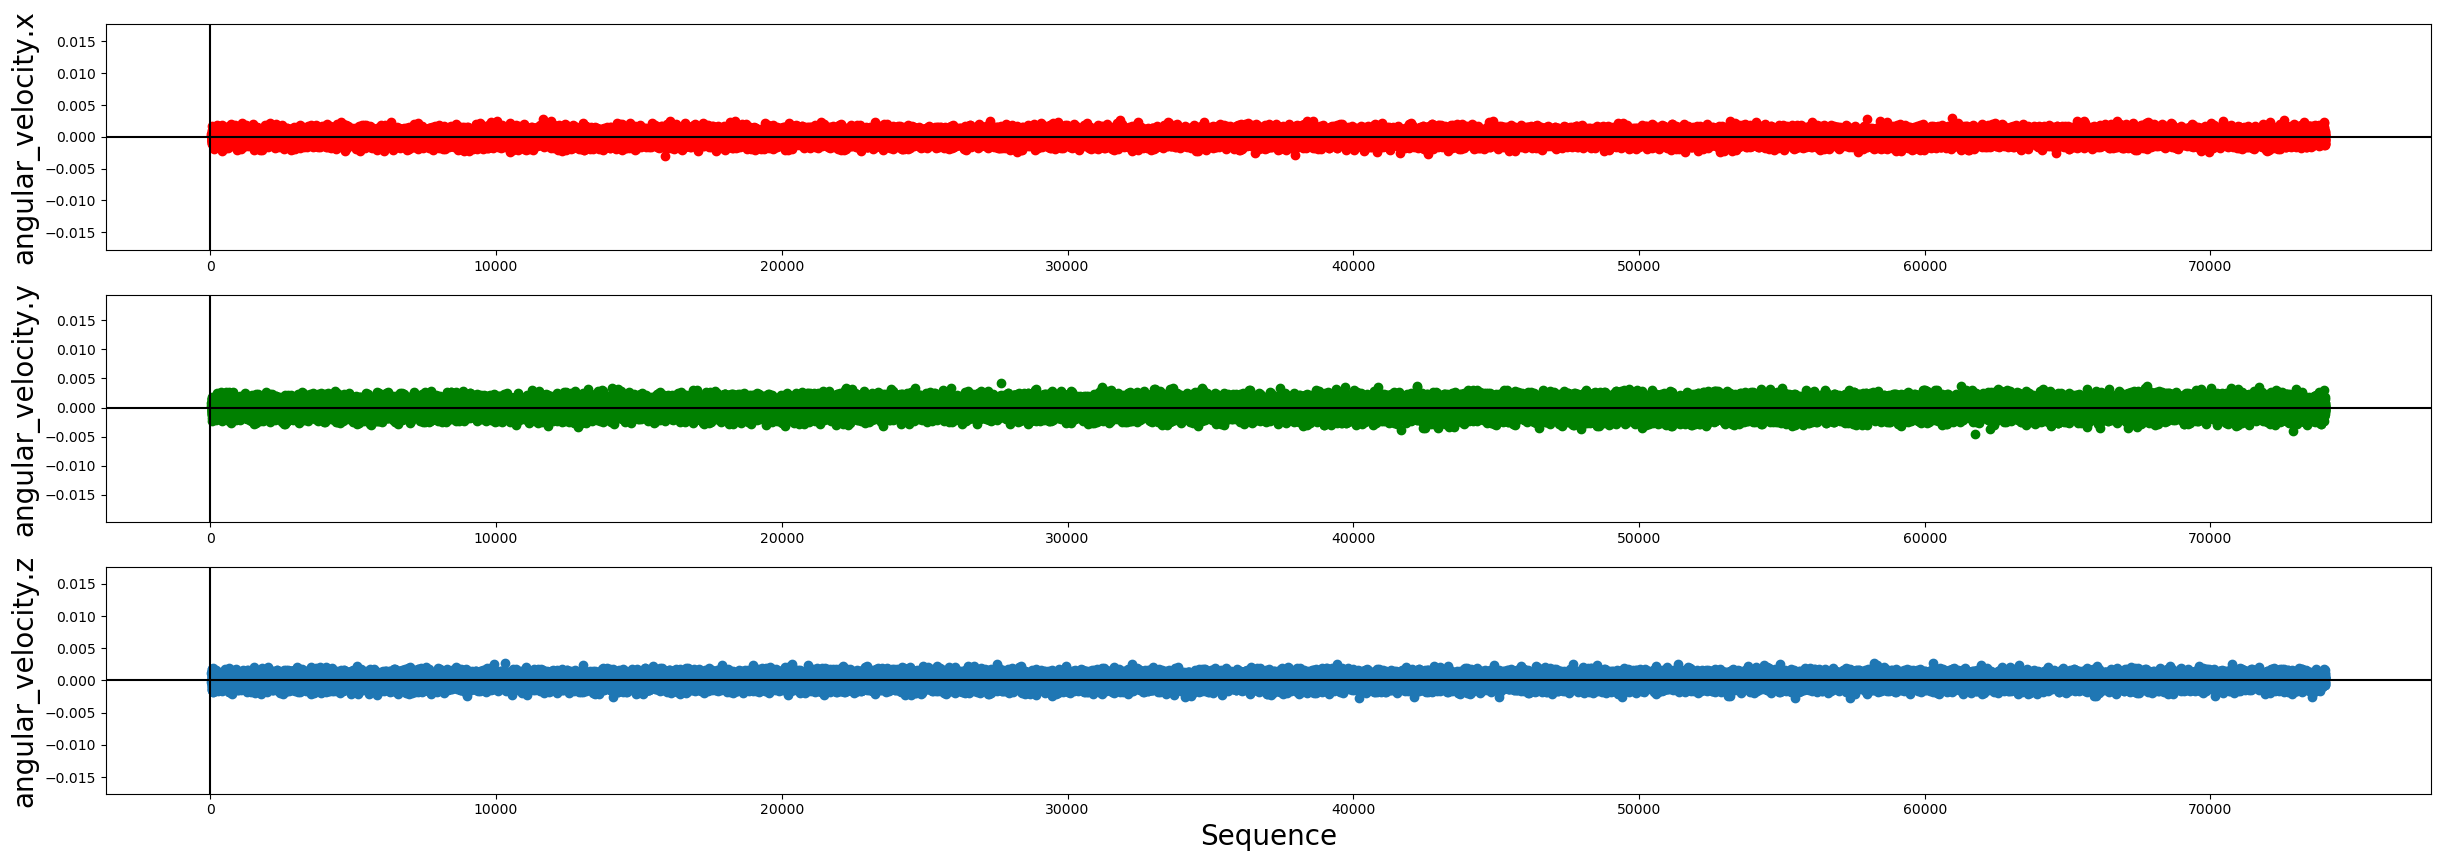

In [9]:

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(30,10))

ax1.scatter(x= df['field.Header.seq'] ,y=df['field.IMU.angular_velocity.x'], color='red')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_ylabel(ylabel='angular_velocity.x', fontsize=20)

ax2.scatter(x= df['field.Header.seq'] ,y=df['field.IMU.angular_velocity.y'], color='green')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_ylabel('angular_velocity.y', fontsize=20)

ax3.scatter(x= df['field.Header.seq'] ,y=df['field.IMU.angular_velocity.z'] )
ax3.axhline(0, color='black')
ax3.axvline(0, color='black')
ax3.set_ylabel('angular_velocity.z', fontsize=20)

plt.xlabel('Sequence', fontsize=20)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)
plt.savefig("Angular Velocity")
plt.show()

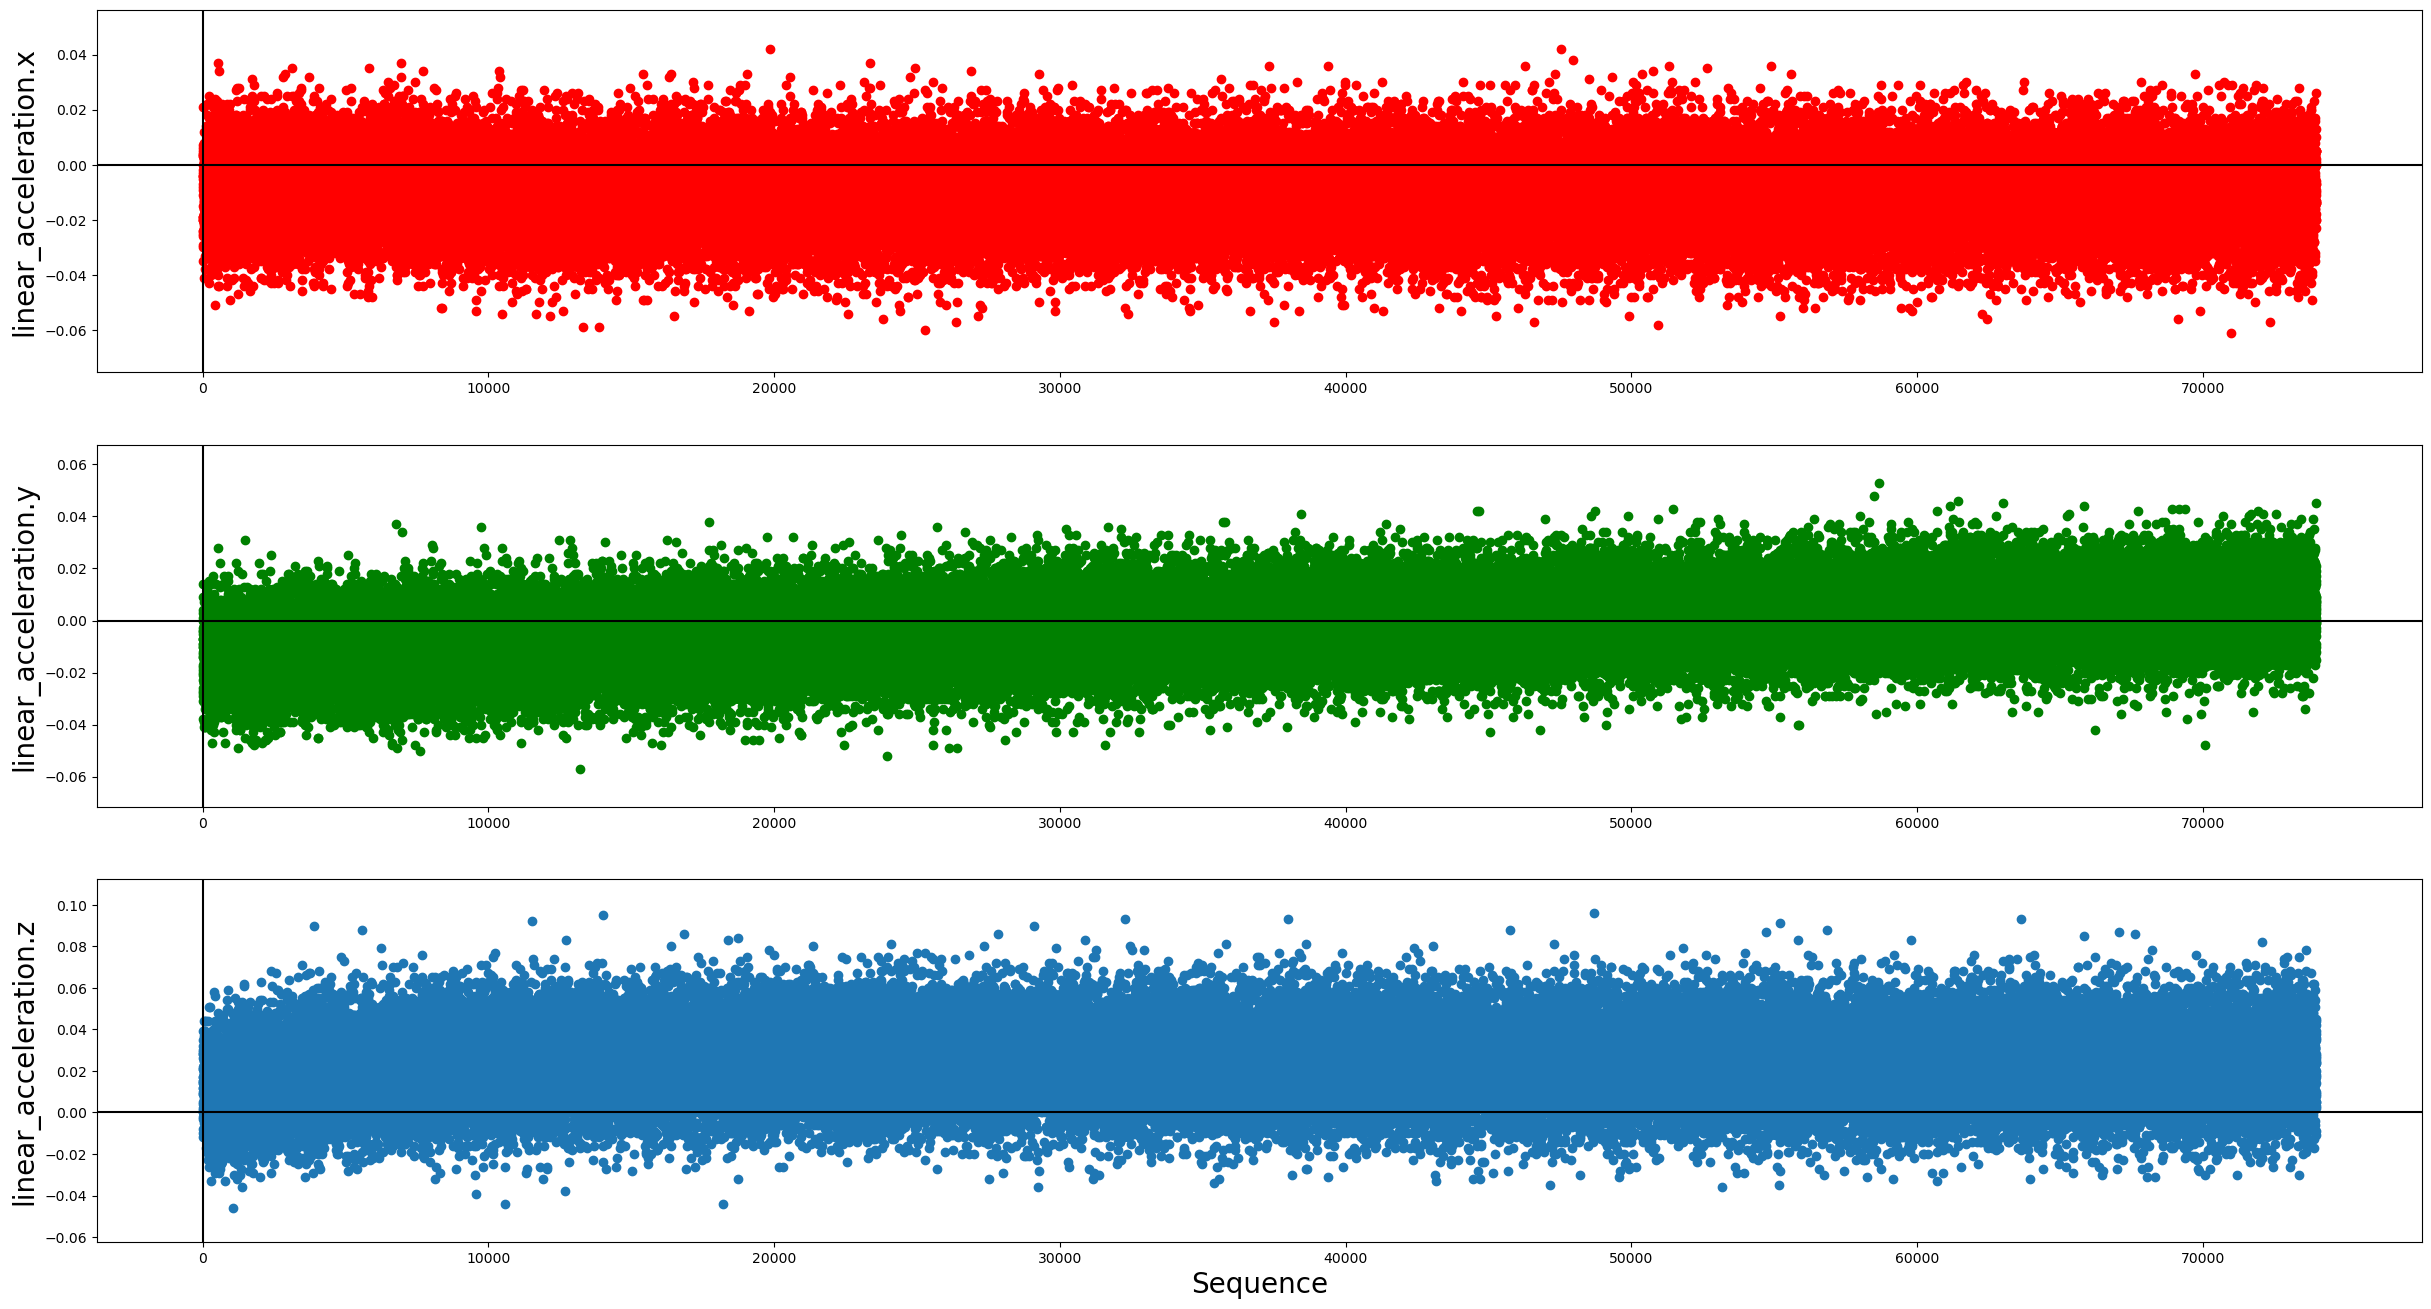

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(30,16))

ax1.scatter(x= df['field.Header.seq']-40 ,y=df['field.IMU.linear_acceleration.x'] -df['field.IMU.linear_acceleration.x'][0], color='red')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_ylabel('linear_acceleration.x', fontsize=20)

ax2.scatter(x= df['field.Header.seq']-40 ,y=df['field.IMU.linear_acceleration.y'] -df['field.IMU.linear_acceleration.y'][0], color='green')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_ylabel('linear_acceleration.y', fontsize=20)

ax3.scatter(x= df['field.Header.seq']-40 ,y=df['field.IMU.linear_acceleration.z']-df['field.IMU.linear_acceleration.z'][0])
ax3.axhline(0, color='black')
ax3.axvline(0, color='black')
ax3.set_ylabel('linear_acceleration.z', fontsize=20)

plt.xlabel('Sequence', fontsize=20)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)
plt.savefig("Linear Acceleration")
plt.show()

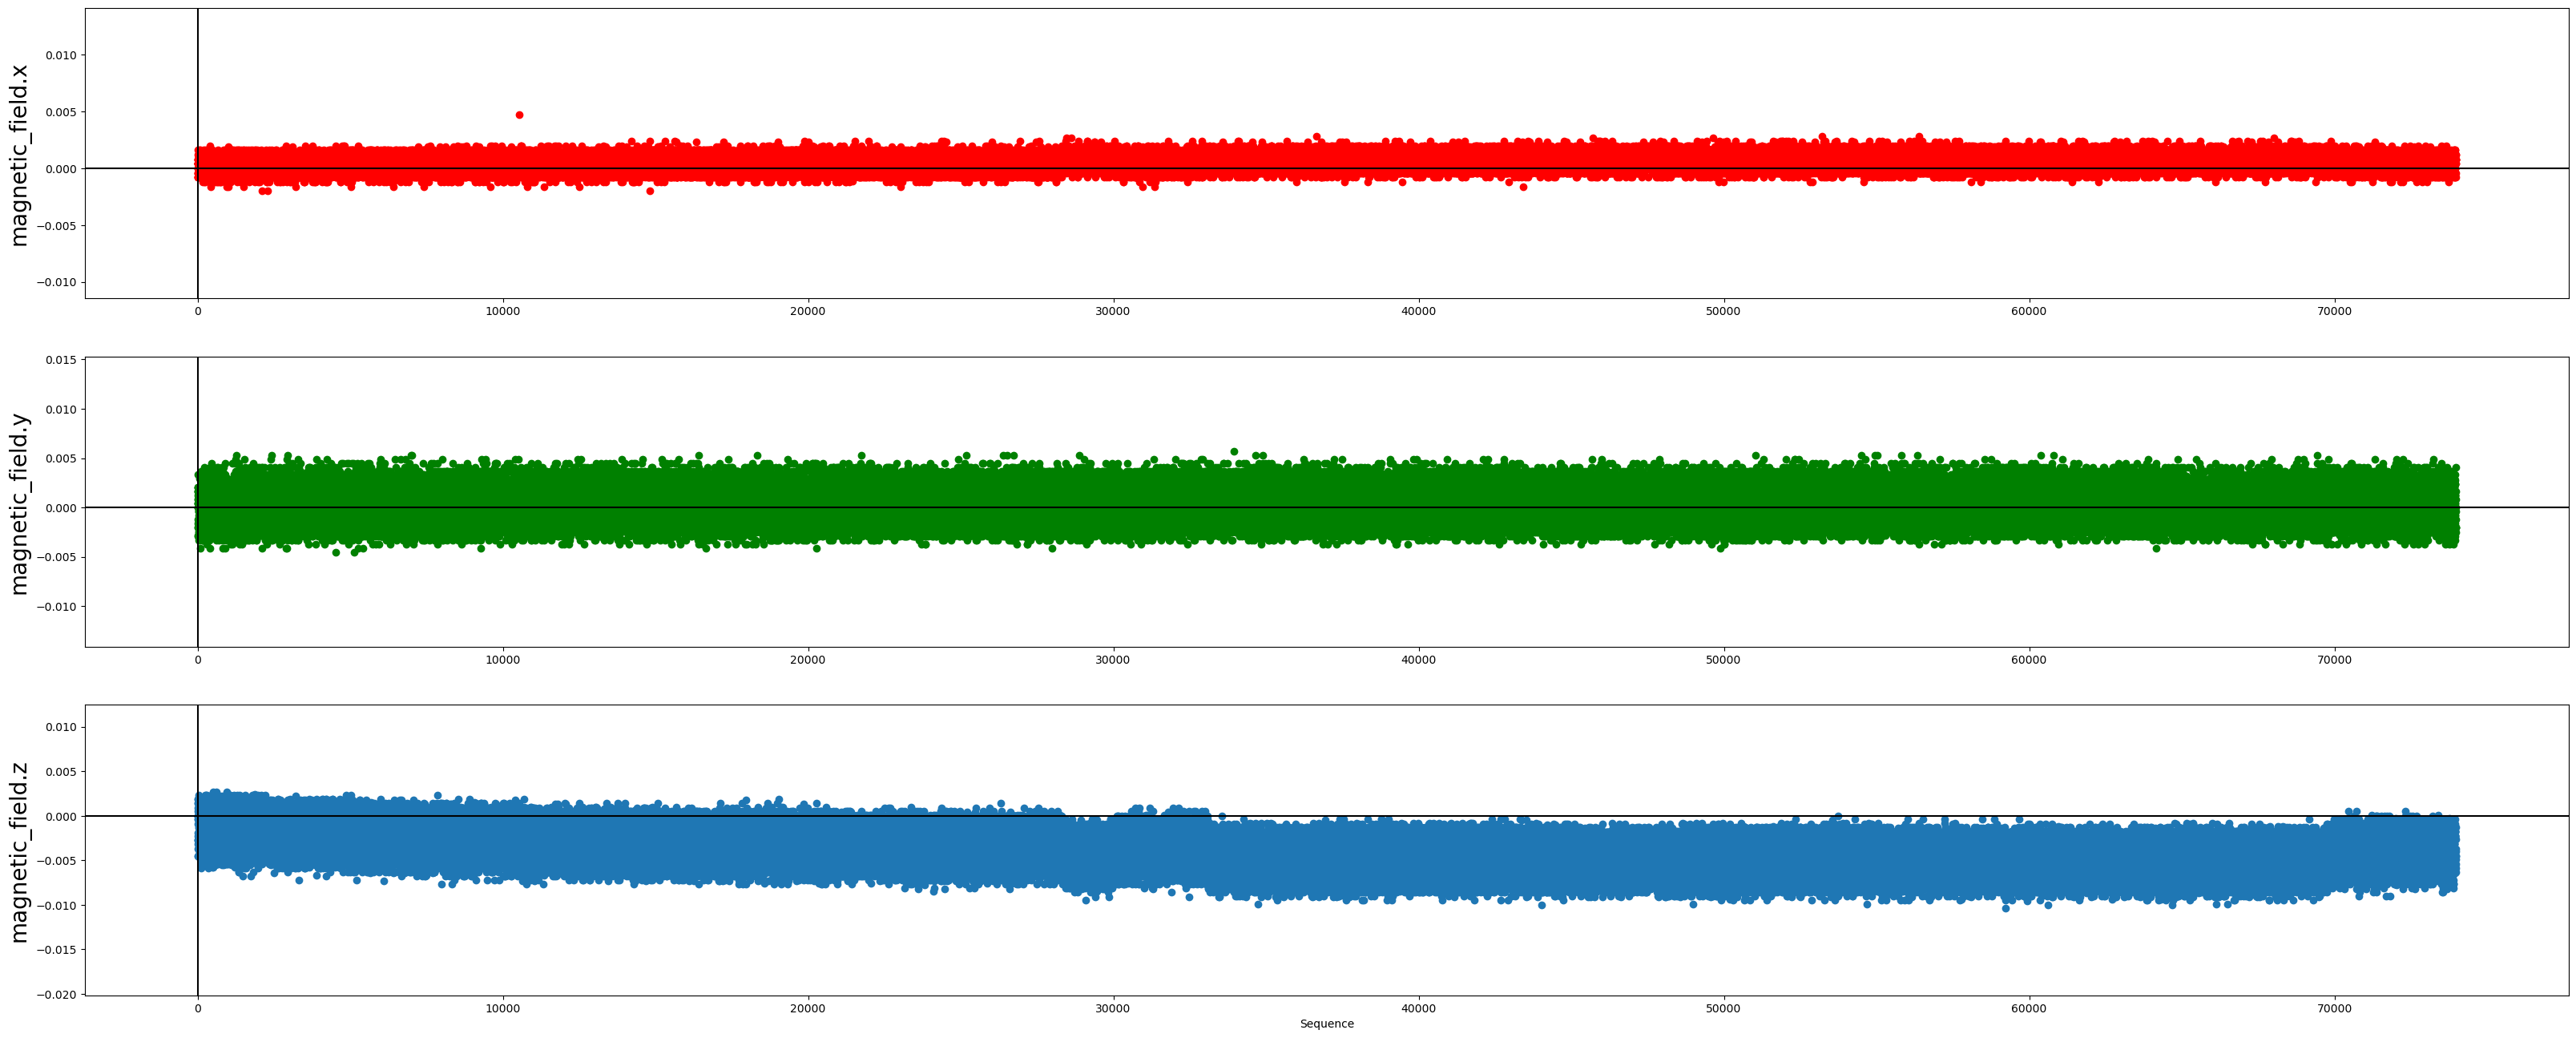

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(40,16))

ax1.scatter(x= df['field.Header.seq']-40 ,y=df['field.MagField.magnetic_field.x'] - df['field.MagField.magnetic_field.x'][0], color='red')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
# ax1.set_prop_cycle(color=['red'])

ax1.set_ylabel('magnetic_field.x', fontsize=20)

ax2.scatter(x= df['field.Header.seq']-40 ,y=df['field.MagField.magnetic_field.y'] - df['field.MagField.magnetic_field.y'][0], color='green')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_ylabel('magnetic_field.y', fontsize=20)

ax3.scatter(x= df['field.Header.seq']-40 ,y=df['field.MagField.magnetic_field.z'] - df['field.MagField.magnetic_field.z'][0])
ax3.axhline(0, color='black')
ax3.axvline(0, color='black')
ax3.set_ylabel('magnetic_field.z', fontsize=20)

plt.xlabel('Sequence')
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)
plt.savefig("Magnetic field")
plt.show()

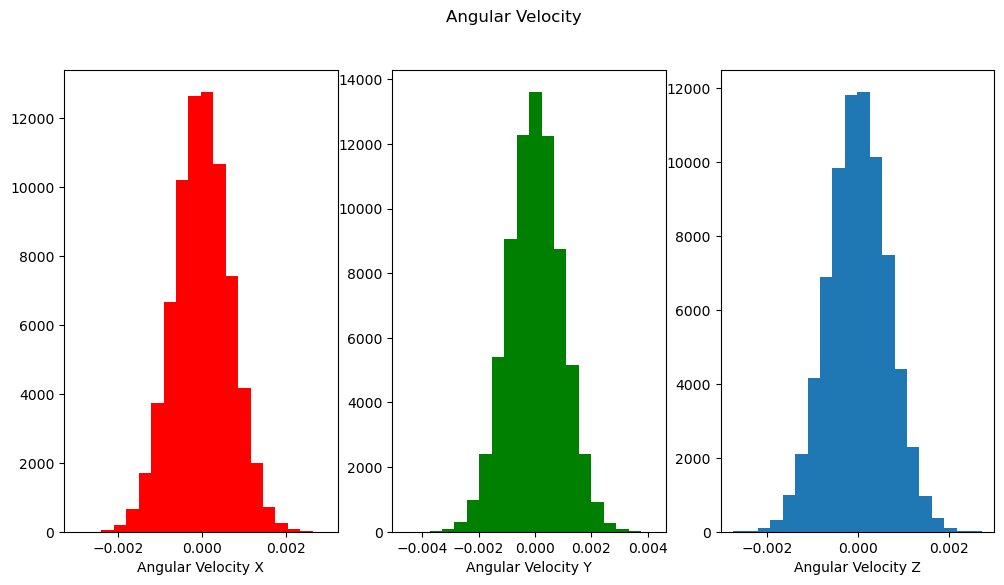

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(12,6))

ax1.hist(df['field.IMU.angular_velocity.x'], bins=20, color='red')
ax2.hist(df['field.IMU.angular_velocity.y'], bins=20, color='green')
ax3.hist(df['field.IMU.angular_velocity.z'], bins=20)
ax1.set(xlabel='Angular Velocity X')
ax2.set(xlabel='Angular Velocity Y')
ax3.set(xlabel='Angular Velocity Z')
fig.suptitle('Angular Velocity')
plt.savefig("Angular Velocity Histogram")
plt.show()

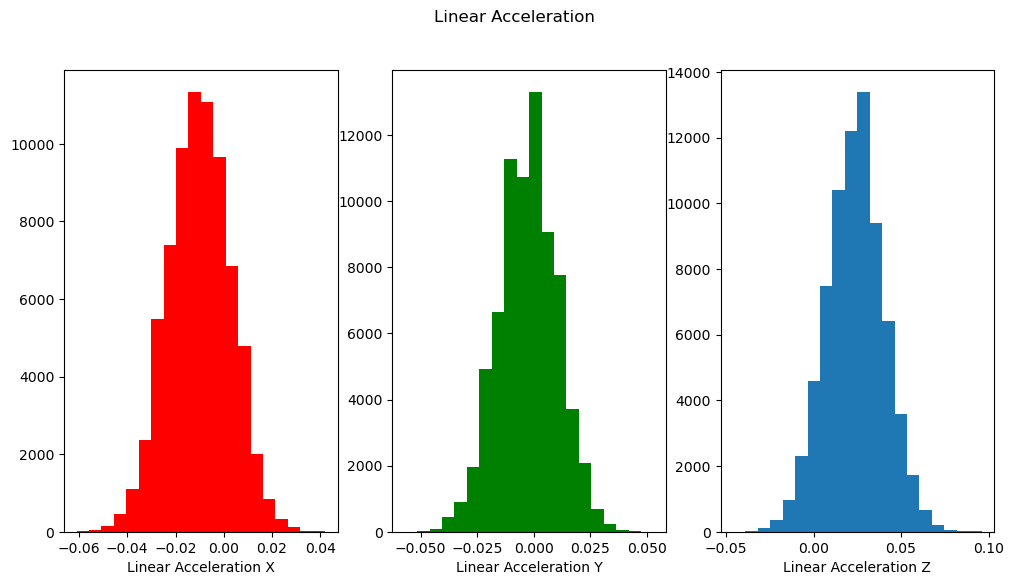

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(12,6))

ax1.hist(df['field.IMU.linear_acceleration.x'] - df['field.IMU.linear_acceleration.x'][0], bins=20, color='red')
ax2.hist(df['field.IMU.linear_acceleration.y'] - df['field.IMU.linear_acceleration.y'][0], bins=20, color='green')
ax3.hist(df['field.IMU.linear_acceleration.z'] - df['field.IMU.linear_acceleration.z'][0], bins=20)
ax1.set(xlabel='Linear Acceleration X')
ax2.set(xlabel='Linear Acceleration Y')
ax3.set(xlabel='Linear Acceleration Z')
fig.suptitle('Linear Acceleration')
plt.savefig("Linear Acceleration Histogram")
plt.show()

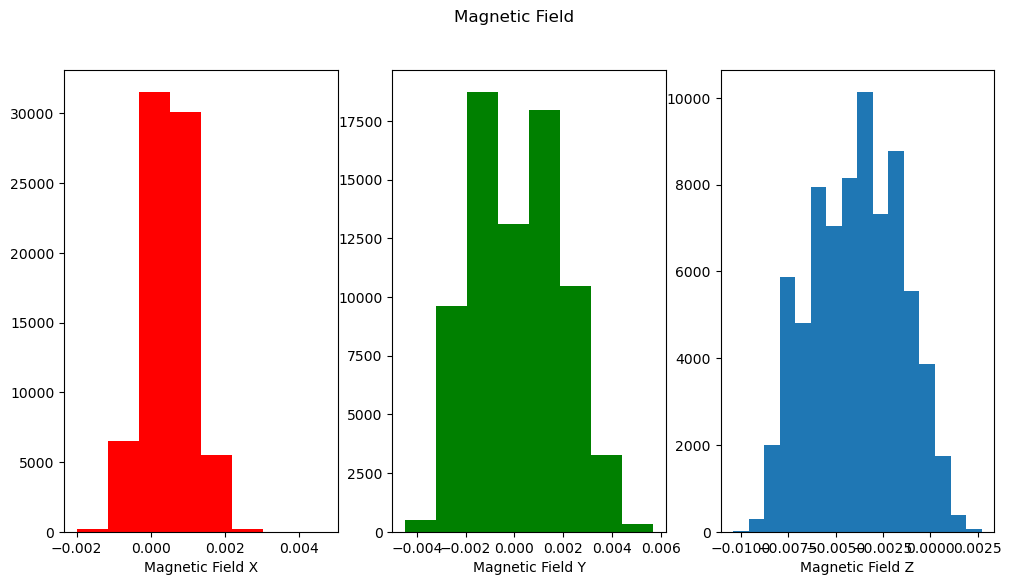

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(12,6))

ax1.hist(df['field.MagField.magnetic_field.x'] - df['field.MagField.magnetic_field.x'][0], bins=8, color='red')
ax2.hist(df['field.MagField.magnetic_field.y'] - df['field.MagField.magnetic_field.y'][0], bins=8, color='green')
ax3.hist(df['field.MagField.magnetic_field.z'] - df['field.MagField.magnetic_field.z'][0], bins=16)
ax1.set(xlabel='Magnetic Field X')
ax2.set(xlabel='Magnetic Field Y')
ax3.set(xlabel='Magnetic Field Z')


fig.suptitle('Magnetic Field')
plt.savefig("Magnetic Field Histogram")
plt.show()

In [13]:
q=Quaternion()
roll =[]
pitch =[]
yaw=[]
for i in range(0, 73971):
    q.x = df['field.IMU.orientation.x'][i]
    q.y =  df['field.IMU.orientation.y'][i]
    q.z = df['field.IMU.orientation.z'][i]
    q.w =  df['field.IMU.orientation.w'][i]
    qlist = [q.x, q.y, q.z, q.w]
    (r, p, y) = euler_from_quaternion(qlist)
    roll.append(r)
    pitch.append(p)
    yaw.append(y)
    
df['roll'] = roll
df['pitch'] = pitch
df['yaw'] = yaw    

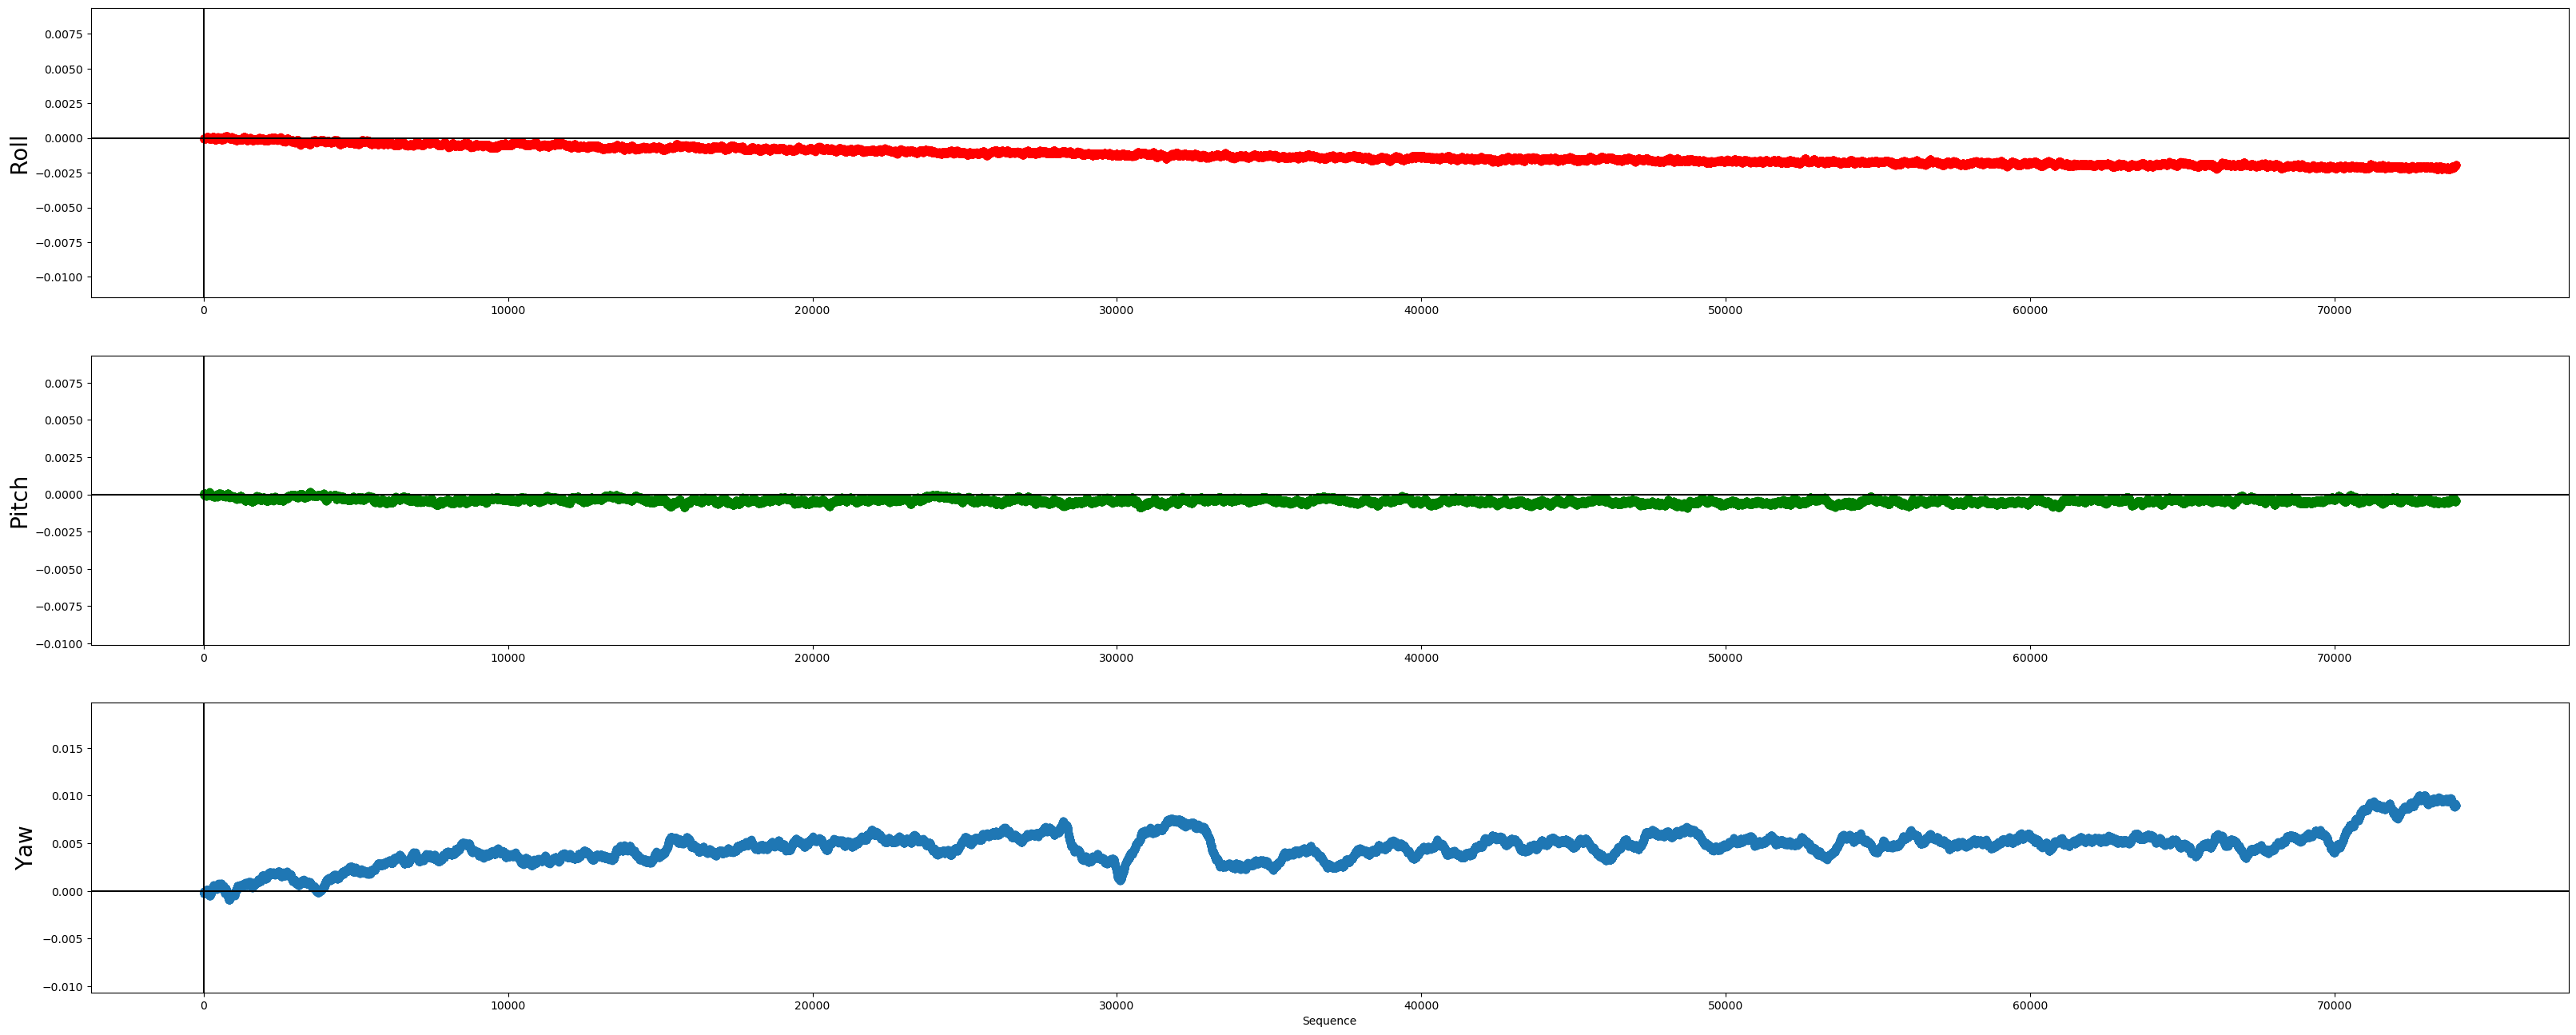

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(40,16))

ax1.scatter(x= df['field.Header.seq']-40 ,y=df['roll'] - df['roll'][0], color='red')
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_ylabel('Roll', fontsize=20)

ax2.scatter(x= df['field.Header.seq']-40 ,y=df['pitch'] - df['pitch'][0], color='green')
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')
ax2.set_ylabel('Pitch', fontsize=20)

ax3.scatter(x= df['field.Header.seq']-40 ,y=df['yaw'] - df['yaw'][0])
ax3.axhline(0, color='black')
ax3.axvline(0, color='black')
ax3.set_ylabel('Yaw', fontsize=20)

plt.xlabel('Sequence')
plt.savefig("Orientation")
plt.show()

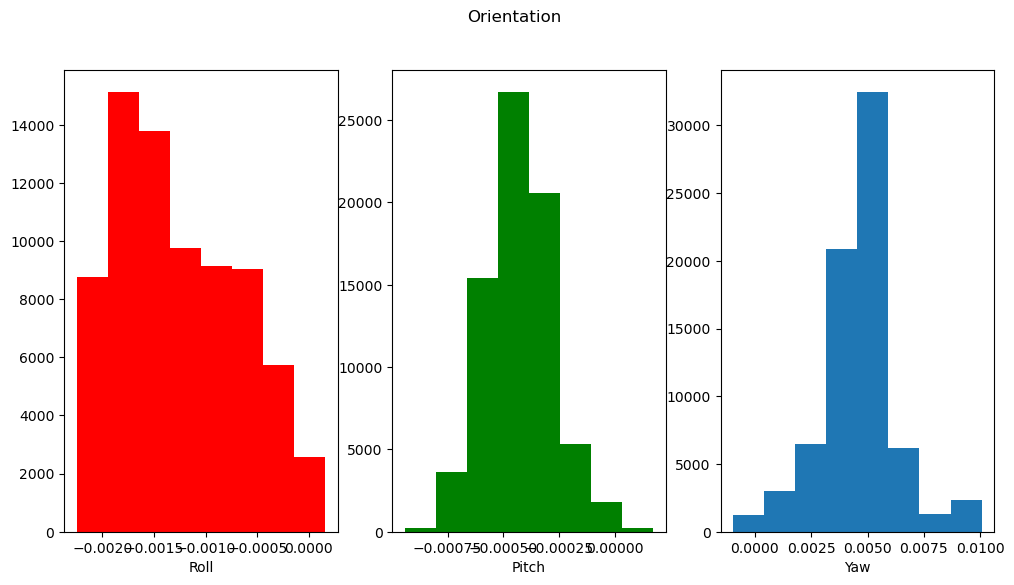

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,6))
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,6))

ax1.hist(df['roll'] - df['roll'][0], bins=8, color='red')
ax2.hist(df['pitch']-df['pitch'][0], bins=8, color='green')
ax3.hist(df['yaw']- df['yaw'][0], bins=8)

ax1.set(xlabel='Roll')
ax2.set(xlabel='Pitch')
ax3.set(xlabel='Yaw')
fig.suptitle('Orientation')
plt.savefig("Orientation Histogram")
plt.show()

In [55]:
selected_columns = [
    'field.IMU.angular_velocity.x',
    'field.IMU.angular_velocity.y',
    'field.IMU.angular_velocity.z',
    'field.IMU.linear_acceleration.x',
    'field.IMU.linear_acceleration.y',
    'field.IMU.linear_acceleration.z',
    'field.MagField.magnetic_field.x',
    'field.MagField.magnetic_field.y',
    'field.MagField.magnetic_field.z',
    'roll',
    'pitch',
    'yaw'
]


selected_df = df[selected_columns]


column_stats = {
    'Column': selected_df.columns,
    'Range': [round(selected_df[col].max() - selected_df[col].min(), 6) for col in selected_df.columns],
    'Mean': [round(selected_df[col].mean(), 6) for col in selected_df.columns],
    'Standard Deviation': [round(selected_df[col].std(), 6) for col in selected_df.columns]
}


stats_df = pd.DataFrame(column_stats)

print(stats_df)

stats_df.to_csv('stats_table.csv', index=False)

                             Column     Range      Mean  Standard Deviation
0      field.IMU.angular_velocity.x  0.005924 -0.000008            0.000668
1      field.IMU.angular_velocity.y  0.008824  0.000001            0.000946
2      field.IMU.angular_velocity.z  0.005469  0.000003            0.000661
3   field.IMU.linear_acceleration.x  0.103000  0.340901            0.012759
4   field.IMU.linear_acceleration.y  0.110000  0.514315            0.012946
5   field.IMU.linear_acceleration.z  0.142000 -9.581304            0.016636
6   field.MagField.magnetic_field.x  0.006700 -0.044128            0.000583
7   field.MagField.magnetic_field.y  0.010200 -0.056231            0.001725
8   field.MagField.magnetic_field.z  0.013100  0.325593            0.002345
9                              roll  0.002409 -0.053638            0.000585
10                            pitch  0.001117  0.035515            0.000151
11                              yaw  0.011048  2.252649            0.001668


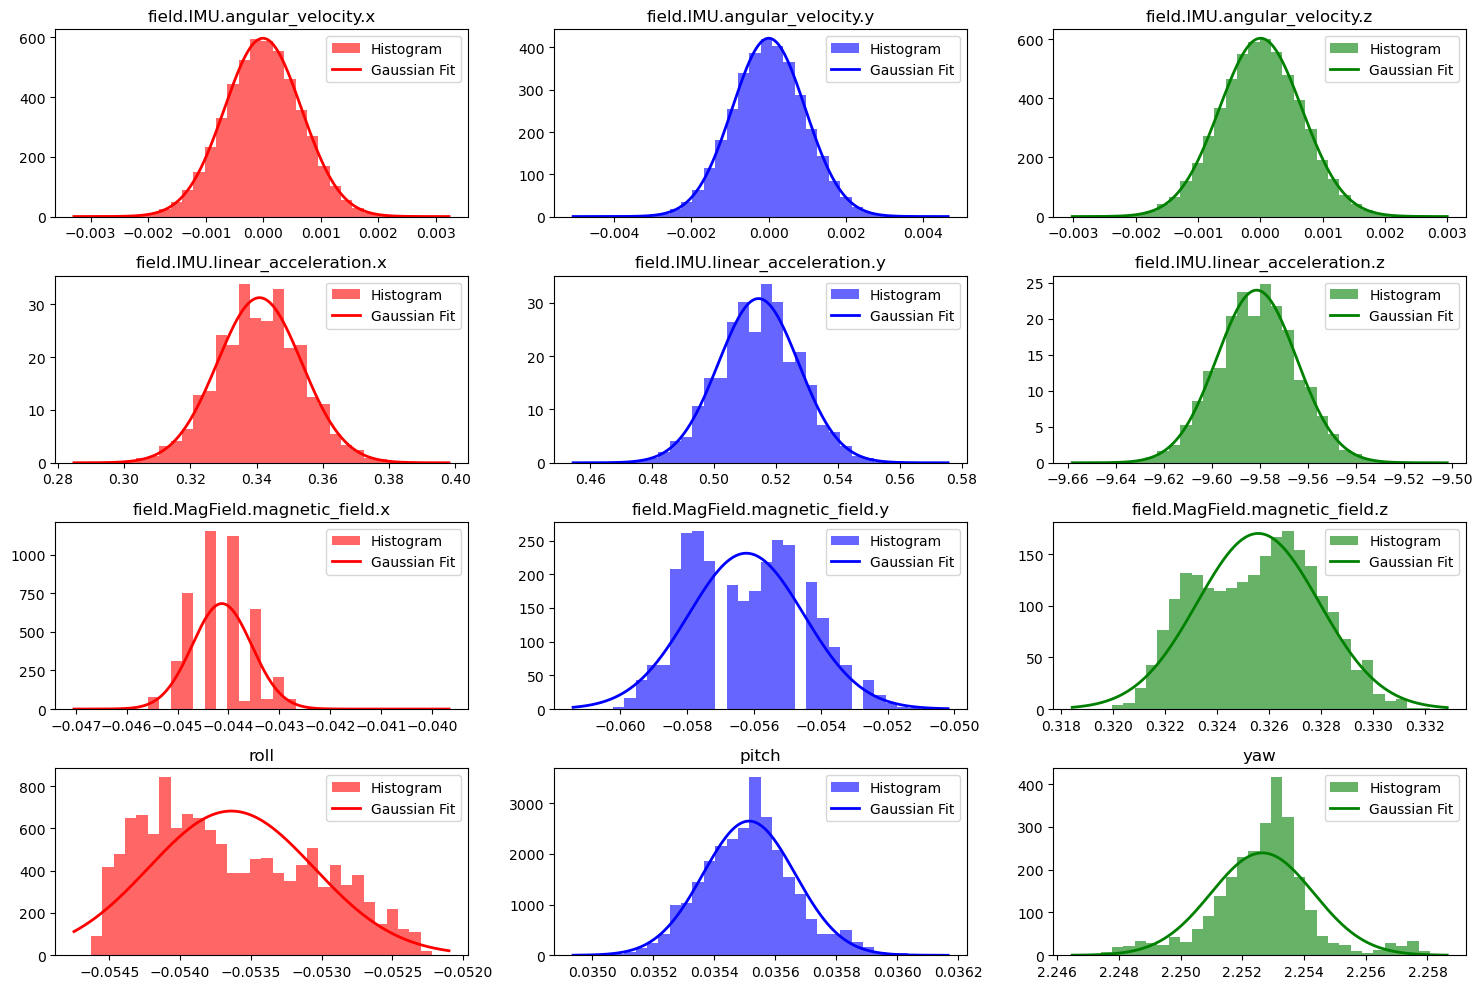

In [21]:
from scipy.stats import norm

row_colors = ['red', 'blue', 'green']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (col, color) in enumerate(zip(selected_columns, row_colors * 4)):
    data = df[col]
    mean = np.mean(data)
    std_dev = np.std(data)

    axes[i].hist(data, bins=30, density=True, alpha=0.6, color=color, label='Histogram')
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mean, std_dev)
    axes[i].plot(x, p, color=color, linewidth=2, label='Gaussian Fit')
    axes[i].set_title(col)
    axes[i].legend()


plt.tight_layout()
plt.savefig("Gaussian Error Fits")
plt.show()

In [40]:
import numpy as np

def cal_drift(data, time):

    time = np.array(time) 
    data = np.array(data)  

    #a linear regression model
    coeffs = np.polyfit(time, data, 1)
    drift = coeffs[0]
#     print(coeffs)
    slope, intercept = coeffs
    
    return coeffs

In [57]:
selected_columns = [
    'field.IMU.angular_velocity.x',
    'field.IMU.angular_velocity.y',
    'field.IMU.angular_velocity.z',
    'field.IMU.linear_acceleration.x',
    'field.IMU.linear_acceleration.y',
    'field.IMU.linear_acceleration.z',
    'field.MagField.magnetic_field.x',
    'field.MagField.magnetic_field.y',
    'field.MagField.magnetic_field.z',
    'roll',
    'pitch',
    'yaw'
]


selected_df = df[selected_columns]
df['stamp_hr']= (df['field.Header.stamp']-df['field.Header.stamp'][0])/((10**9)*3600)

column_stats = {
    'Column': selected_df.columns,
    'Drift (per hour)': [cal_drift(selected_df[col], df['stamp_hr'])[0] for col in selected_df.columns],
    
}


stats_df = pd.DataFrame(column_stats)

print(stats_df)

stats_df.to_csv('stats_table.csv', index=False)

                             Column  Drift (per hour)
0      field.IMU.angular_velocity.x          0.000120
1      field.IMU.angular_velocity.y         -0.000044
2      field.IMU.angular_velocity.z          0.000012
3   field.IMU.linear_acceleration.x         -0.002971
4   field.IMU.linear_acceleration.y          0.038681
5   field.IMU.linear_acceleration.z          0.003671
6   field.MagField.magnetic_field.x          0.000871
7   field.MagField.magnetic_field.y          0.000240
8   field.MagField.magnetic_field.z         -0.006147
9                              roll         -0.003869
10                            pitch         -0.000346
11                              yaw          0.006994
